In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/archive.zip'

Archive:  /content/drive/MyDrive/archive.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: test_da

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_gen=ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen=ImageDataGenerator(rescale=(1./255))

In [6]:
train=train_gen.flow_from_directory('/content/train_data/train_data',target_size=(120,120),class_mode='categorical',batch_size=8)
test=test_gen.flow_from_directory('/content/test_data/test_data',target_size=(120,120),class_mode='categorical',batch_size=8)


Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [7]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [8]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 136s 7s/step - loss: 4.2953 - accuracy: 0.0867 - val_loss: 2.8868 - val_accuracy: 0.0637
Epoch 2/10
19/19 [==============================] - 127s 7s/step - loss: 2.6433 - accuracy: 0.1467 - val_loss: 2.6602 - val_accuracy: 0.1338
Epoch 3/10
19/19 [==============================] - 111s 6s/step - loss: 2.4600 - accuracy: 0.2267 - val_loss: 2.6250 - val_accuracy: 0.1656
Epoch 4/10
19/19 [==============================] - 110s 6s/step - loss: 2.2321 - accuracy: 0.2333 - val_loss: 2.6560 - val_accuracy: 0.1401
Epoch 5/10
19/19 [==============================] - 109s 6s/step - loss: 2.1418 - accuracy: 0.2467 - val_loss: 2.6593 - val_accuracy: 0.1019
Epoch 6/10
19/19 [==============================] - 130s 7s/step - loss: 1.9847 - accuracy: 0.3533 - val_loss: 2.6775 - val_accuracy: 0.1911
Epoch 7/10
19/19 [==============================] - 130s 7s/step - loss: 1.9136 - accuracy: 0.3667 - val_loss: 2.6480 - val_accuracy: 0.1401
Epoch 8/10
19

In [12]:
model.save('BirdsWeights.h5')

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [14]:
img = image.load_img('/content/parrot.webp',target_size=(120,120))

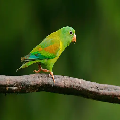

In [15]:
img

In [16]:
img = image.img_to_array(img)
img

array([[[ 35.,  60.,   6.],
        [ 37.,  62.,   5.],
        [ 38.,  64.,   0.],
        ...,
        [ 45.,  80.,   4.],
        [ 45.,  79.,   6.],
        [ 43.,  78.,   7.]],

       [[ 35.,  60.,   6.],
        [ 37.,  62.,   5.],
        [ 38.,  64.,   3.],
        ...,
        [ 45.,  80.,   4.],
        [ 45.,  79.,   6.],
        [ 43.,  78.,   7.]],

       [[ 35.,  60.,   6.],
        [ 37.,  62.,   5.],
        [ 38.,  63.,   5.],
        ...,
        [ 45.,  80.,   4.],
        [ 45.,  79.,   6.],
        [ 43.,  78.,   7.]],

       ...,

       [[ 28.,  46.,   6.],
        [ 29.,  50.,   6.],
        [ 28.,  54.,   4.],
        ...,
        [ 77., 107.,  33.],
        [ 77., 107.,  33.],
        [ 77., 107.,  33.]],

       [[ 30.,  48.,   8.],
        [ 31.,  52.,   8.],
        [ 30.,  57.,   7.],
        ...,
        [ 76., 106.,  34.],
        [ 75., 105.,  31.],
        [ 74., 107.,  32.]],

       [[ 29.,  50.,   6.],
        [ 30.,  53.,   6.],
        [ 29.,  

In [17]:
img = np.expand_dims(img,axis=0)
img
     

array([[[[ 35.,  60.,   6.],
         [ 37.,  62.,   5.],
         [ 38.,  64.,   0.],
         ...,
         [ 45.,  80.,   4.],
         [ 45.,  79.,   6.],
         [ 43.,  78.,   7.]],

        [[ 35.,  60.,   6.],
         [ 37.,  62.,   5.],
         [ 38.,  64.,   3.],
         ...,
         [ 45.,  80.,   4.],
         [ 45.,  79.,   6.],
         [ 43.,  78.,   7.]],

        [[ 35.,  60.,   6.],
         [ 37.,  62.,   5.],
         [ 38.,  63.,   5.],
         ...,
         [ 45.,  80.,   4.],
         [ 45.,  79.,   6.],
         [ 43.,  78.,   7.]],

        ...,

        [[ 28.,  46.,   6.],
         [ 29.,  50.,   6.],
         [ 28.,  54.,   4.],
         ...,
         [ 77., 107.,  33.],
         [ 77., 107.,  33.],
         [ 77., 107.,  33.]],

        [[ 30.,  48.,   8.],
         [ 31.,  52.,   8.],
         [ 30.,  57.,   7.],
         ...,
         [ 76., 106.,  34.],
         [ 75., 105.,  31.],
         [ 74., 107.,  32.]],

        [[ 29.,  50.,   6.],
       

In [18]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 120ms/step


15

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [20]:
img1 = image.load_img('/content/parrot.webp',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn', 'gretit','hilpig','himbul','himgri','hsparo', 'indvul', 'jglowl','lbicrw', 'mgprob', 'rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 44ms/step
15
wcrsrt


In [21]:
img1 = image.load_img('/content/owl.jpg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn', 'gretit','hilpig','himbul','himgri','hsparo', 'indvul', 'jglowl','lbicrw', 'mgprob', 'rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 30ms/step
7
himbul


In [22]:
model = Sequential()
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(62,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 118, 118, 12)      336       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 12)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 24)        2616      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 24)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 36)        7812      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 36)      

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
img1 = image.load_img('/content/pigeon.webp',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn', 'gretit','hilpig','himbul','himgri','hsparo', 'indvul', 'jglowl','lbicrw', 'mgprob', 'rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 158ms/step
1
bonegl


In [27]:
img1 = image.load_img('/content/crow.jpeg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn', 'gretit','hilpig','himbul','himgri','hsparo', 'indvul', 'jglowl','lbicrw', 'mgprob', 'rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 39ms/step
1
bonegl


In [28]:
from tensorflow.keras.layers import BatchNormalization, Dropout
     

In [29]:
# Initializing the seq model
model = Sequential()
# Adding conv layer with input
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
# Normalizing the conv layer output
model.add(BatchNormalization())
# Selecting the max values
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropping the unwanted 20% of data
model.add(Dropout(0.2))
model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
# Hiddern layers
model.add(Dense(62,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
# Output layer
model.add(Dense(4,activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 118, 118, 12)      336       
                                                                 
 batch_normalization (BatchN  (None, 118, 118, 12)     48        
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 59, 59, 12)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 59, 59, 12)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 57, 57, 24)        2616      
                                                                 
 batch_normalization_1 (Batc  (None, 57, 57, 24)      

In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
     

In [33]:
early_stop = EarlyStopping(monitor='accuracy',patience=8)

In [35]:
"""VGG"""

'VGG'

In [36]:
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
     

In [37]:
train_path='/content/train_data/train_data'

In [38]:
test_path='/content/test_data/test_data'

In [39]:
train_gen = ImageDataGenerator(rescale=1./255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=1./255) 
     

In [40]:
train = train_gen.flow_from_directory(train_path,
                                      target_size=(224,224),
                                      batch_size=22,
                                      class_mode='categorical')

test = test_gen.flow_from_directory(test_path,
                                      target_size=(224,224),
                                      batch_size=22,
                                      class_mode='categorical')

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [41]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
     

In [42]:
vgg = VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [43]:
for layer in vgg.layers:
  print(layer)

In [44]:
for layer in vgg.layers:
  layer.trainable=False
     

In [45]:
x = Flatten()(vgg.output)

In [46]:
prediction = Dense(4,activation='softmax')(x)

In [47]:
model = Model(inputs=vgg.input,outputs=prediction)

In [48]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [49]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [69]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [70]:
resnet = ResNet50(include_top=False,input_shape=(224,224,3))
     

94765736/94765736 [==============================] - 1s 0us/step


In [71]:

for layer in resnet.layers:
  layer.trainable=False

In [72]:
for layer in resnet.layers:
  print(layer)

In [73]:
x = Flatten()(resnet.output)

In [74]:
out = Dense(4, activation='softmax')(x)
     

res_model = Model(inputs=resnet.input,outputs=out)
     

res_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [77]:
res_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])